<a href="https://colab.research.google.com/github/HariTarz/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Importing necessary libraries

In [210]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Mounting my google drive

In [211]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Creating path variable for both the datasets

In [212]:
#creating data files path and reading the csv files
playstore_data_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Cohort Amsot/Module 1/EDA Capstone Project/Play store Review Analysis/dat/Play Store Data.csv'
playstore_df = pd.read_csv(playstore_data_path)
user_reviews_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Cohort Amsot/Module 1/EDA Capstone Project/Play store Review Analysis/dat/User Reviews.csv'
user_reviews_df = pd.read_csv(user_reviews_path)

#Viewing data set features, values and struture of Playstore database

In [213]:
#viewing playstore dataframe
playstore_df.head(-1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up


In [214]:
#viewing info of playstore dataframe
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [215]:
#viewing the available numeric column details
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [216]:
#viewing the columns name
playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#Viewing data set features, values and struture of User reviews database

In [217]:
#viewing the database
user_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [218]:
#viewing the database info

user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [219]:
#viewing the database numeric details

user_reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


#Cleaning the data of playstore database
* Finding carbage values from all the colums and  drop the rows
* Drop the found carpage containing rows
* Coverting 'Size' column into valid numeric column
* Coverting 'Reviews' column into valid numeric column
* Coverting 'Installs' column into valid numeric column




In [220]:
# Finding the row with insufficiant data
playstore_df[playstore_df['Type']!='Free'][playstore_df[playstore_df['Type']!='Free']['Price']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [221]:
#Droping the row from the data frame
playstore_df.drop(playstore_df[playstore_df['Type']!='Free'][playstore_df[playstore_df['Type']!='Free']['Price']=='0'].index, inplace=True)

In [222]:
#Finding value mismatched row
playstore_df[playstore_df['Genres']=='February 11, 2018']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [223]:
#Finding the index of the row which containing the carbage values
playstore_df[playstore_df['Genres']=='February 11, 2018'].index

Int64Index([10472], dtype='int64')

In [224]:
#Droping the found carbage row from our dataframe
playstore_df.drop(playstore_df[playstore_df['Genres']=='February 11, 2018'].index, inplace=True)

In [225]:
#Clean string function
def clean_it(num):
  """This function takes a string and replace the following characters if present, '+', ',' ,'$', 'M', 'k', 'NaN'"""
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'M' in num:
    num = str(int(float(num.replace('M',''))*1000000))
  if 'k' in num:
    num = str(int(float(num.replace('k',''))*1000))
  if 'NaN' in num:
    num = '0'
  else:
    pass
  return num

In [226]:
# Cleaning the unwanted charactors and converting the required column values into valid numeric type

#Changing the 'Reviews' column values into valid numeric values
playstore_df['Reviews'] = pd.to_numeric(playstore_df['Reviews'])

#Changing the 'Size' column values into valid numeric values
playstore_df['Size'] = playstore_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playstore_df['Size'] = pd.to_numeric(playstore_df['Size'].map(lambda x: clean_it(x)))

#Changing the 'Installs' column values into valid numeric values
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'].map(lambda x: clean_it(x)))

#Changing the 'Price' column values into valid numeric values
playstore_df['Price'] = pd.to_numeric (playstore_df['Price'].map(lambda x:clean_it(x)))
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  int64  
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


#Cleaning the data ofUser reviews database
* Eleminating the null value rows from the database

In [227]:
#Eleminating the null value rows from the database

non_null_user_reviews_df = user_reviews_df[~user_reviews_df['Sentiment'].isna()]
non_null_user_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [228]:
non_null_user_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


#Data Preparation
* Taking only unique app details in a dataframe
* From the data frame grouping the required columns such as Count, Reviews, Size, Rating and Installs, Price based on the Genres

In [229]:
#Filtering duplicate apps
dupli_col_chk = playstore_df['App'].duplicated().any()
dupli_col_chk

True

In [230]:
#Apps and their counts
playstore_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
U-Report                                             1
U of I Community Credit Union                        1
Waiting For U Launcher Theme                         1
Wi u Emulator                                        1
iHoroscope - 2018 Daily Horoscope & Astrology        1
Name: App, Length: 9658, dtype: int64

In [231]:
#taking all the last rows of data for each app
ps_last_r_df = playstore_df.groupby('App').tail(1).reset_index()
app_rev_max_df = ps_last_r_df.loc[ps_last_r_df.groupby(['App'])['Reviews'].idxmax()]

In [232]:
#Getting Genres
top_genres = app_rev_max_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [233]:
top_genres

,Genres,Count
0,Tools,828
1,Entertainment,561
2,Education,510
3,Business,419
4,Medical,396
...,...,...
113,Health & Fitness;Action & Adventure,1
114,Art & Design;Pretend Play,1
115,Travel & Local;Action & Adventure,1
116,Trivia;Education,1


In [234]:
#Preparing dataframe which contains free app install counts
genres_installs = app_rev_max_df.groupby(['Genres'])[['Installs']].sum()
genres_installs
app_rev_max_df

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7703,8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3600000,500,Free,0.00,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
7351,8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22000000,1000000,Free,0.00,Everyone,Social,"August 2, 2018",5.03,4.1 and up
267,324,- Free Comics - Comic Apps,COMICS,3.5,115,9100000,10000,Free,0.00,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3360,4541,.R,TOOLS,4.5,259,203000,10000,Free,0.00,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
3455,4636,/u/app,COMMUNICATION,4.7,573,53000000,10000,Free,0.00,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5153,6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59000000,100000,Free,0.00,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
3181,4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
1774,2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18000000,1000000,Free,0.00,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
6378,7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3200000,10000,Free,0.00,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [235]:
#Preparing dataframe which contains paid app install counts
paid_apps_installs = playstore_df[playstore_df['Price']!= 0].groupby(['Genres'])[['Installs']].sum().rename(columns={'Installs':'Paid_app_installs'})

In [236]:
#Preparing dataframe which contains mean Rating
genres_ratings = app_rev_max_df.groupby(['Genres'])[['Rating']].mean()
genres_ratings

,Rating
Genres,
Action,4.244863
Action;Action & Adventure,4.316667
Adventure,4.178873
Adventure;Action & Adventure,4.300000
Adventure;Brain Games,4.600000
...,...
Trivia;Education,NaN
Video Players & Editors,4.043243
Video Players & Editors;Music & Video,4.000000


In [237]:
#Mergering all the data previous dataframes
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_genres_apps_installs = pd.merge(top_genres_installs, paid_apps_installs, on='Genres')
top_genres_apps_installs_ratings = pd.merge(top_genres_apps_installs, genres_ratings, on='Genres')

#Getting top 50 data frames based on the Genres
top_50_genres = top_genres_apps_installs_ratings.head(50)
top_50_genres

,Genres,Count,Installs,Paid_app_installs,Rating
0,Tools,828,8092771915,1727441,4.039638
1,Entertainment,561,3014714684,242171,4.083439
2,Education,510,262910148,106247,4.290909
3,Business,419,692164865,412775,4.096565
4,Medical,396,39203077,1020033,4.169416
5,Personalization,376,1532494782,5258794,4.332215
6,Productivity,374,5788091369,1412055,4.183389
7,Lifestyle,368,493823539,1179110,4.093667
8,Finance,345,455348734,185602,4.115563
9,Sports,331,1412474498,1243815,4.223308


#Exploring app 'Genres' and Count

From the given database the apps can be filtered or grouped one feature with one or more other features for diffenrent view of information gathering. Playsotre has given a feature called 'Genres' with that we can come to know that to which the app is related to. 'Genres' means it denotes a style or category. One app can have more than one'Genres'. Here we have plotted a bar chat to know about the Genres and and corresponding apps count, which are belongs to the 'Genres'.

  This bar chart will give as the following:
  * What are the top 10 Genres based on the downloads?
  * Which genres having the most number of app counts?
  * Which are genres having the less number of app counts?


Text(0.5, 0, 'Genres')

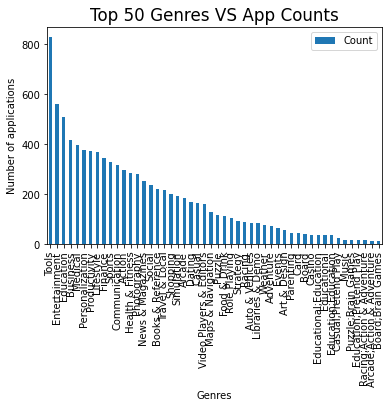

In [238]:
#Plotting Top 50 Genres VS App counts bar chart
top_50_genres[['Genres','Count']].set_index('Genres').plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Top 50 Genres VS App Counts')
plt.ylabel('Number of applications')
plt.xlabel('Genres')

# Exploring Installed Free and paid apps

People always download, install and use the apps based on their necessity or interest. In playstore both free and paid apps are available in all the Genres or Category. Generally people always prefer free apps than paid apps untill all the free apps of the particular Genres or Category is not satisfied or not fullfilled their purpose. So we have plotted again a bar chart based on the top genres and install counts for both free and paid apps.

This will shows the following facts as results.
* Which genres having the highest number of free apps installed?
* Which genres having the highest number of free apps installed?
* What kind of purposes people are prefering the paid apps?
* Which kind of free apps are giving good service than the corresponding paid app?

Text(0.5, 0, 'Genres')

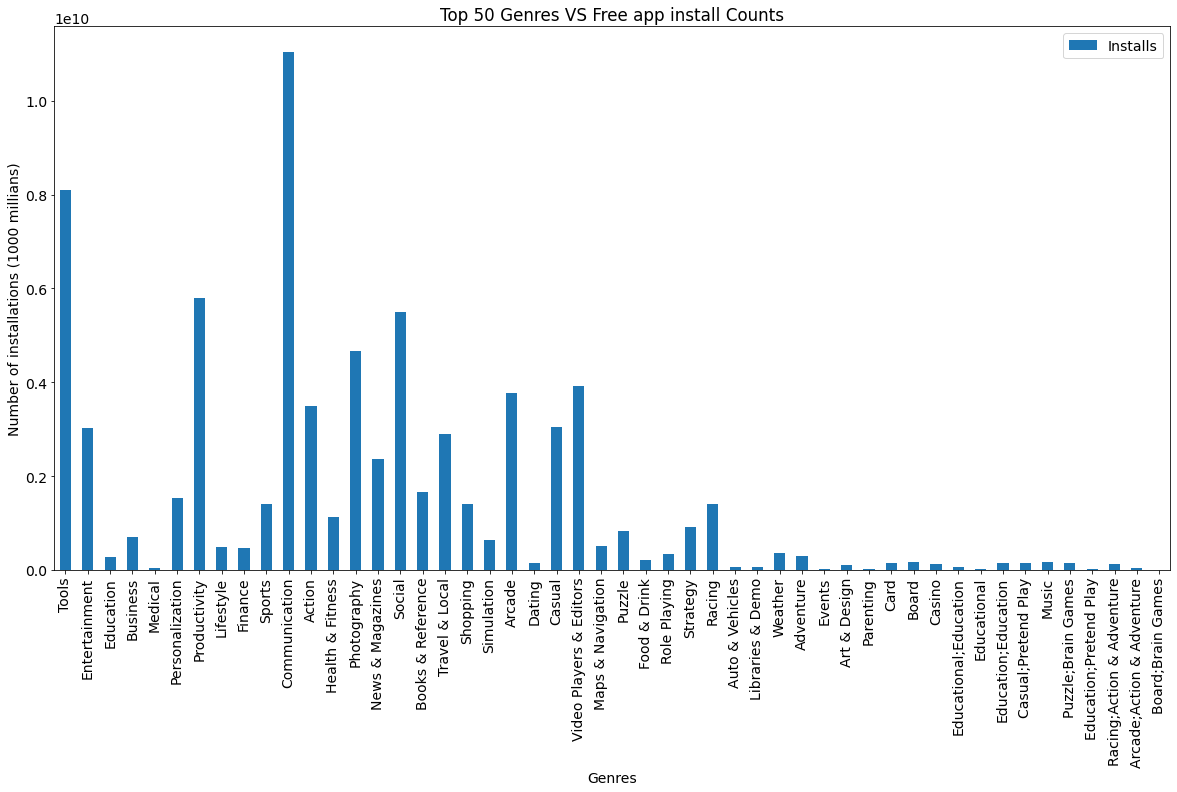

In [239]:
#Plotting Top 50 Genres VS Free apps install count chart

top_50_genres[['Genres','Installs']].set_index('Genres').plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Top 50 Genres VS Free app install Counts')
plt.ylabel('Number of installations (1000 millians)')
plt.xlabel('Genres')

Text(0.5, 0, 'Genres')

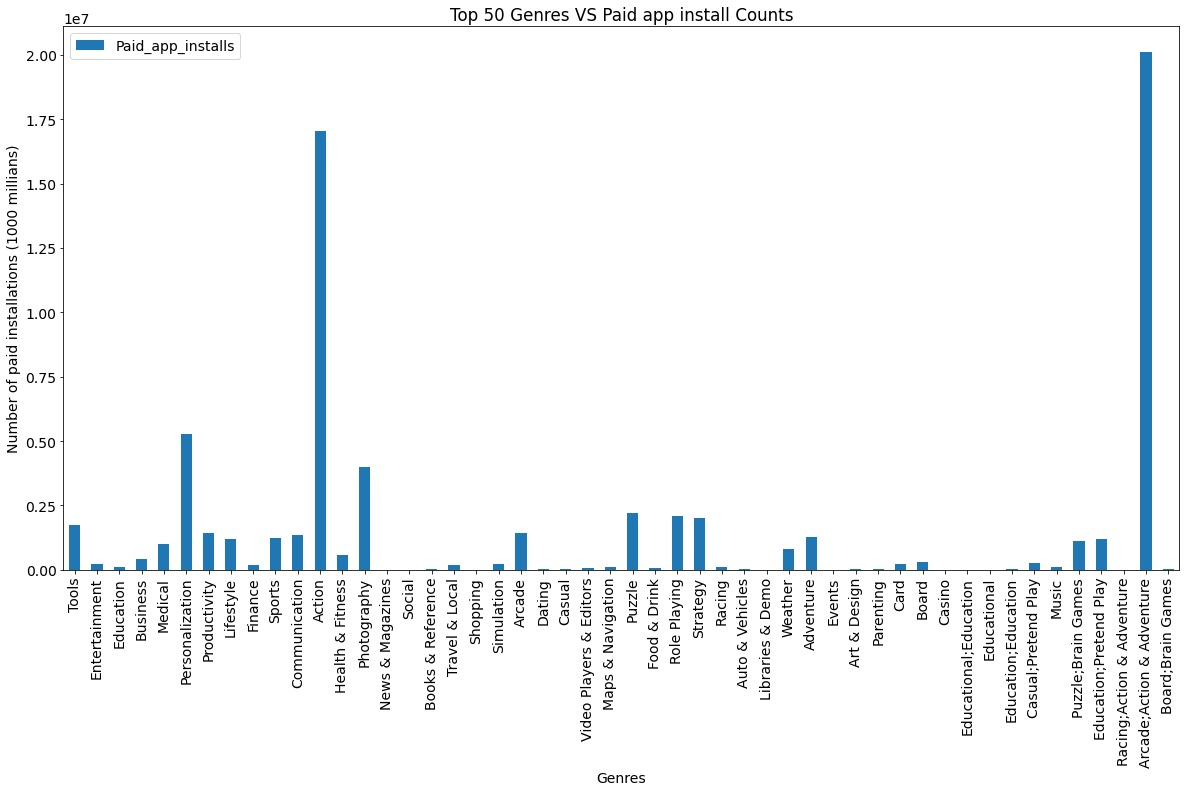

In [240]:
#Plotting Top 50 Genres VS Paid apps install count chart

top_50_genres[['Genres','Paid_app_installs']].set_index('Genres').plot(kind='bar')
plt.title('Top 50 Genres VS Paid app install Counts')
plt.ylabel('Number of paid installations (1000 millians)')
plt.xlabel('Genres')

#Analysing the relationship between the free apps, paid apps and their price

As we saw earlier people generally goes with free apps, but if they really want it, then they have to buy the paid apps by spending some money. The price of the apps may vari based on the features and uses. Here we have plotted the comparision between the paid and free apps, price variation based on the app Category

* The 1st plot gives the installation count comparision between the Free and Paid apps
* 2nd plot shows the price ranges as histogram 
* 3rd plot shows the price ranges across different categories 

In [241]:
#Category wise free and paid app installs count
categoty_type_installs = playstore_df.groupby(['Category','Type'])[['Installs']].sum().unstack().reset_index()
categoty_type_installs = categoty_type_installs[~categoty_type_installs['Installs']['Paid'].isna()].set_index('Category')
categoty_type_installs

Installs            
Type                         Free        Paid
Category                                     
ART_AND_DESIGN       1.243221e+08     16000.0
AUTO_AND_VEHICLES    5.308006e+07     50150.0
BOOKS_AND_REFERENCE  1.921446e+09     23316.0
BUSINESS             1.001502e+09    412775.0
COMMUNICATION        3.264592e+10   1360050.0
DATING               2.642895e+08     21350.0
EDUCATION            8.708500e+08    602000.0
ENTERTAINMENT        2.868960e+09    200000.0
EVENTS               1.597316e+07         1.0
FAMILY               1.022699e+10  31271814.0
FINANCE              8.764631e+08    185602.0
FOOD_AND_DRINK       2.738388e+08     60000.0
GAME                 3.506492e+10  21099965.0
HEALTH_AND_FITNESS   1.582498e+09    574110.0
LIBRARIES_AND_DEMO   6.299581e+07       100.0
LIFESTYLE            5.364644e+08   1179110.0
MAPS_AND_NAVIGATION  7.241608e+08    121100.0
MEDICAL              5.223740e+07   1020033.0
NEWS_AND_MAGAZINES   7.496312e+09      5500.0
PARENTING            3.147101e+07     50100.0
PERSONALIZATION      2.320236e+09   5258794.0
PHOTOGRAPHY          1.008427e+10   3978740.0
PRODUCTIVITY         1.417468e+10   1412055.0
SHOPPING             3.247839e+09     10100.0
SOCIAL               1.406986e+10      6000.0
SPORTS               1.749931e+09   1243815.0
TOOLS                1.145104e+10   1727441.0
TRAVEL_AND_LOCAL     6.868704e+09    183060.0
VIDEO_PLAYERS        6.221932e+09     71000.0
WEATHER              4.252885e+08    812000.0

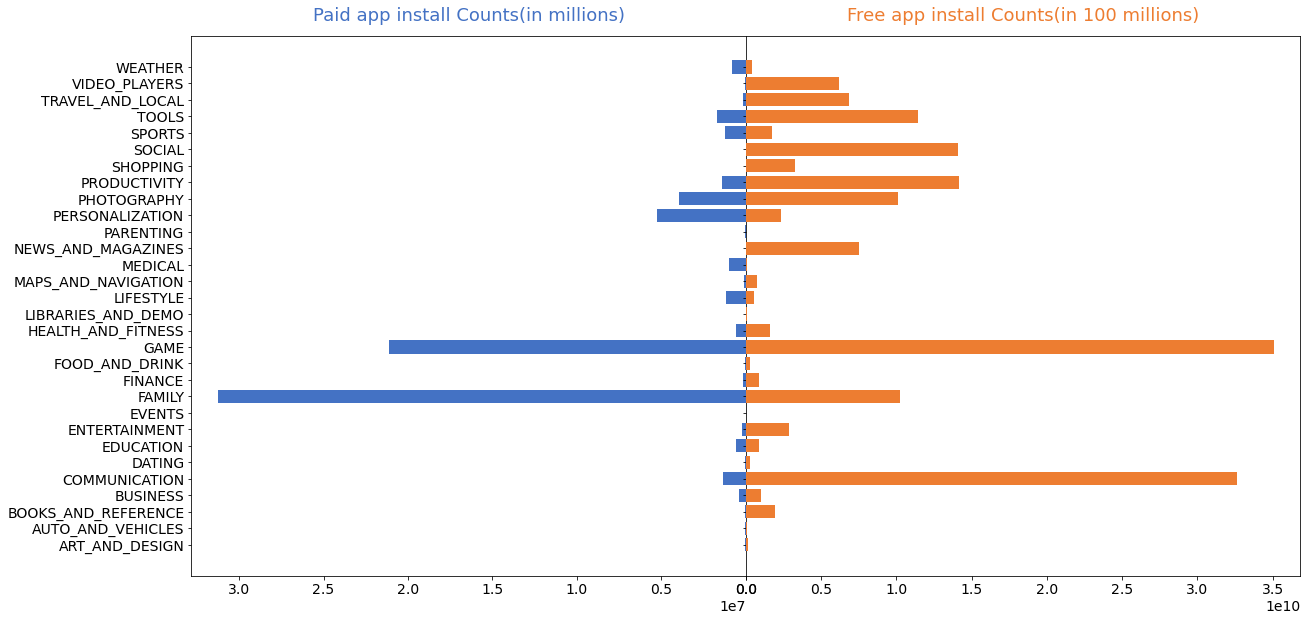

In [242]:
#Plot between Paid and Free installed app counts
color_red = '#4472c4'
color_blue = '#ed7d31'

ind = categoty_type_installs.index
column0 = categoty_type_installs['Installs']['Paid']
column1 = categoty_type_installs['Installs']['Free']
title0 = 'Paid app install Counts(in millions)'
title1 = 'Free app install Counts(in 100 millions)'

fig, axes = plt.subplots(figsize=(20,10), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(ind, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red)
axes[1].barh(ind, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue)
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

Text(0.5, 1.0, 'Histogram of Price')

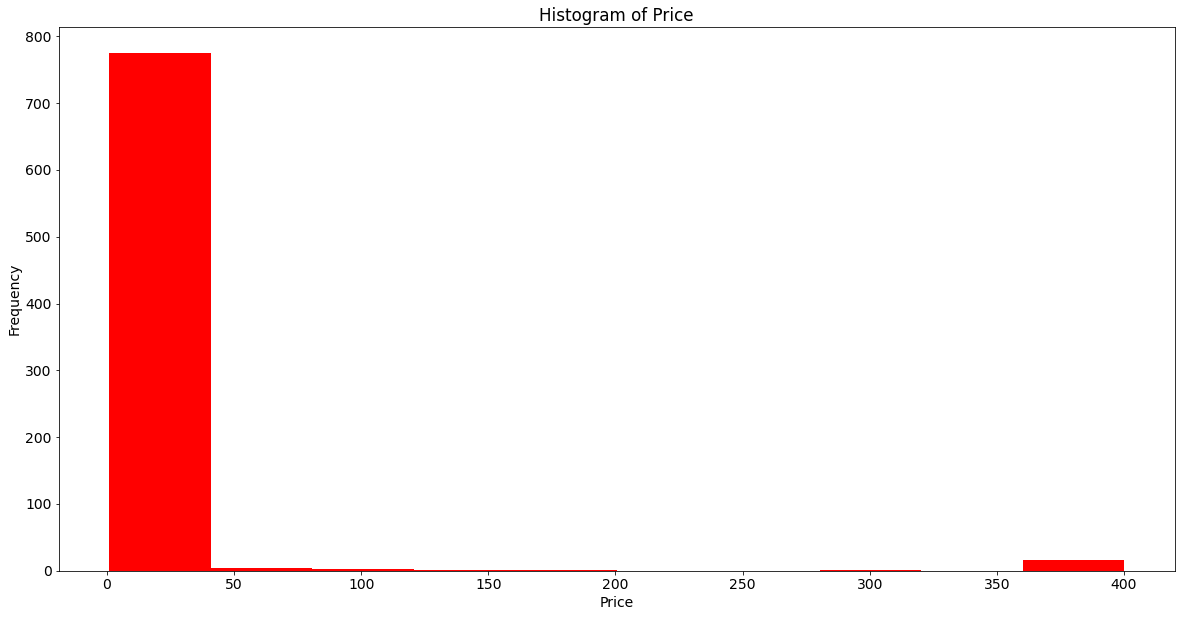

In [243]:
#Histogram of pice range of piad apps
price = playstore_df[~playstore_df['Price'].isna() & playstore_df['Price'] != 0]['Price']
plt.hist(price.values, color='Red')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

Text(0.5, 1.0, 'App pricing trend across categories(in USD)')

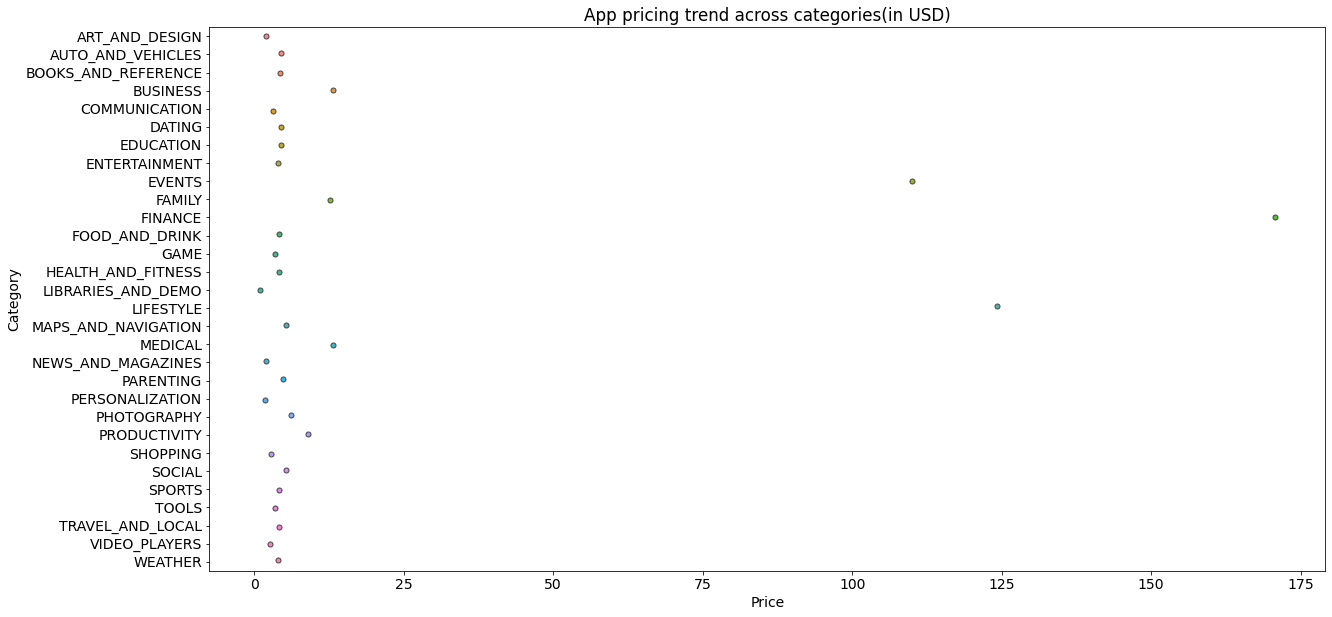

In [244]:
#App pricing across categories for Paid apps
categrory_price_mean_df = playstore_df[playstore_df['Price'] !=  0].groupby(['Category'])['Price'].mean().reset_index(name='Price')
ax = sns.stripplot(x='Price', y='Category', data=categrory_price_mean_df, jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories(in USD)')
# categrory_price_mean_df

#Analyse based on the Ratings
The analysing of app ratings is important because, this only gives the information how much an app is liked or disliked by the people. So that we have plotted the histrogram for Ratings and in the 2nd plot, it shows the category wise avg rating.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


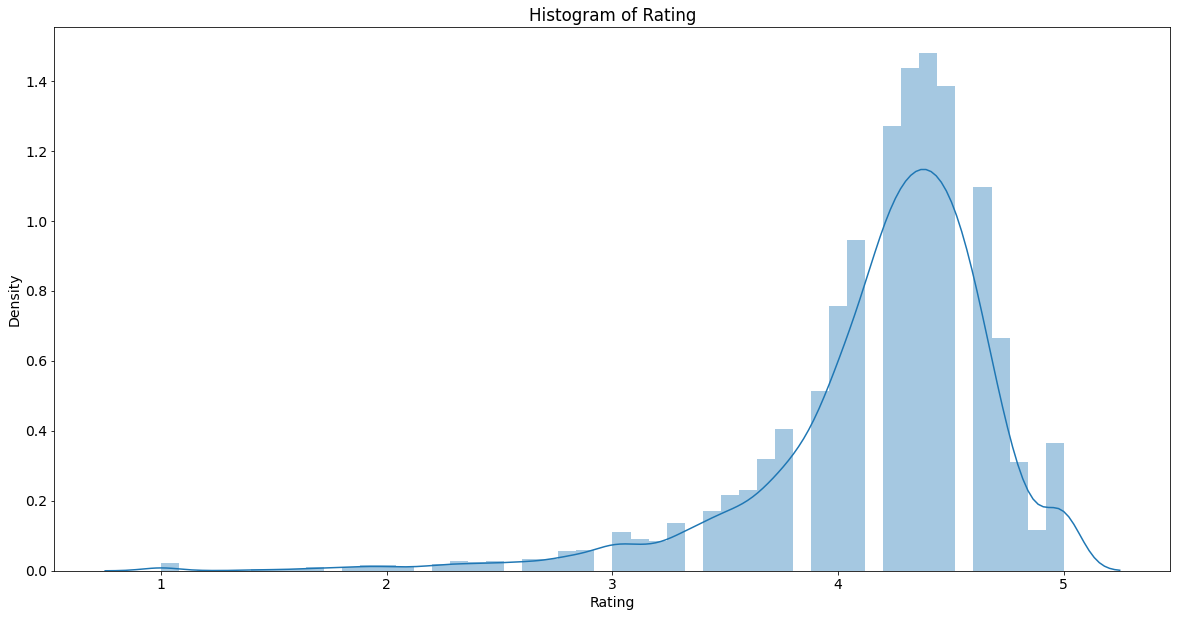

In [245]:
#Ploting the histogram Rating
rating = playstore_df[~playstore_df['Rating'].isna()]['Rating']

plt.title('Histogram of Rating')
sns.distplot(rating, hist=True)

Text(0.5, 0, 'Category')

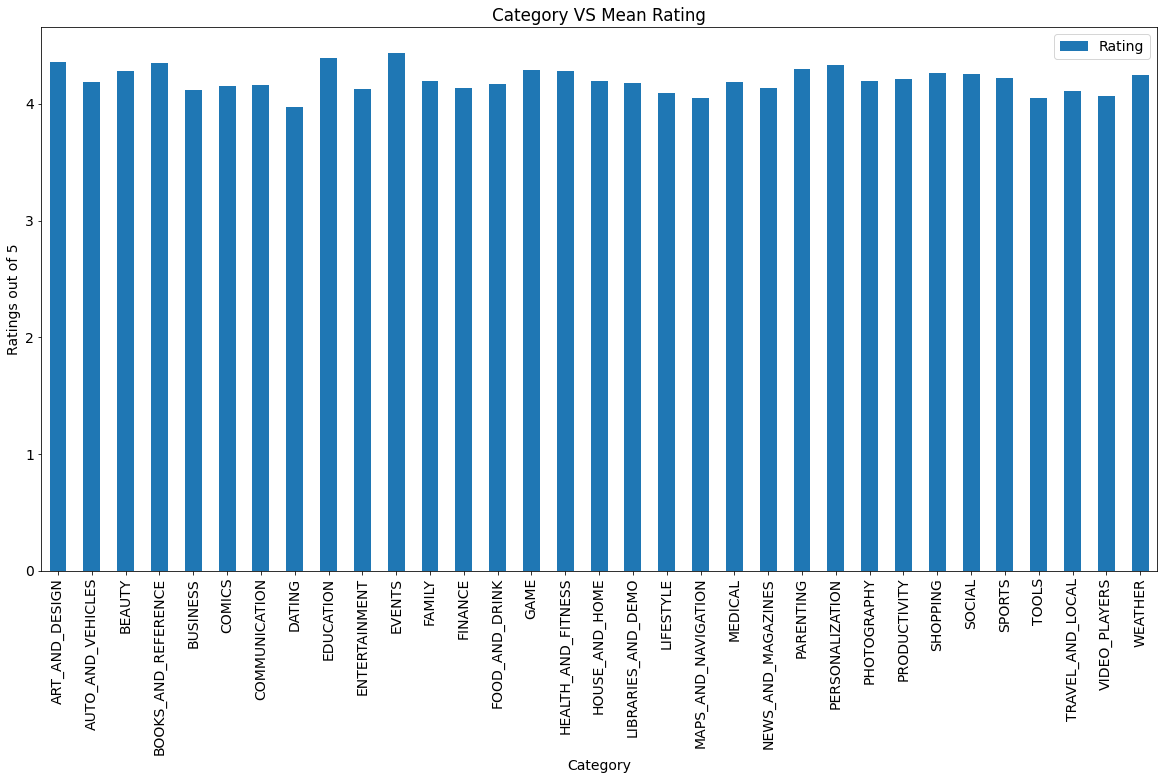

In [246]:
#ploting Catefgory wise mean Rating
category_mean_rating_df = playstore_df.groupby(['Category'])['Rating'].mean().reset_index(name='Rating')
category_mean_rating_df.set_index('Category').plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('Category VS Mean Rating')
plt.ylabel('Ratings out of 5')
plt.xlabel('Category')

In [247]:
#Ratings given by different age of people
playstore_df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

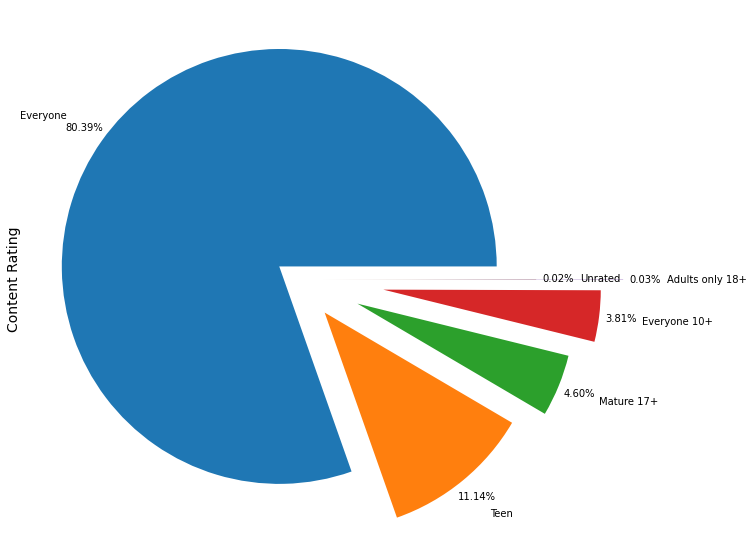

In [248]:
playstore_df['Content Rating'].value_counts().plot(kind='pie', fontsize=10, explode= (0.1,0.2,0.3,0.4,0.5,0.1), autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2)
# .Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [249]:
#Getting the top downloaded 10 apps and their Ratings vs Reviews
top_downloaded_apps = playstore_df.groupby('App').tail(1).sort_values(['Installs','Rating'], ascending=False).head(50)
top_10_downloaded_apps = top_downloaded_apps.head(10).set_index('App')[['Rating','Reviews']].sort_values(['Reviews'])

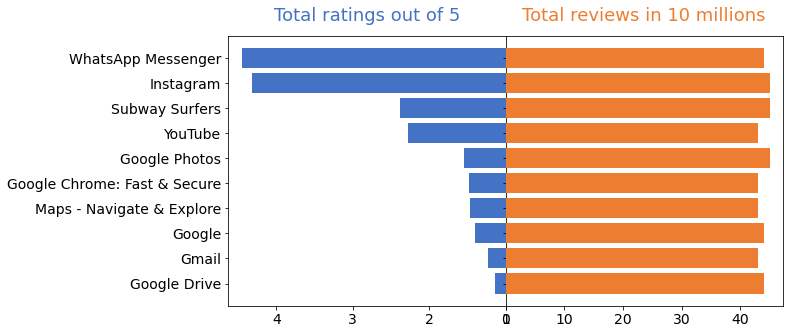

In [250]:
#Plotting between Top ratting apps and reviews
color_red = '#4472c4'
color_blue = '#ed7d31'

ind = top_10_downloaded_apps.index
column0 = top_10_downloaded_apps['Reviews']
column1 = top_10_downloaded_apps['Rating']
title0 = 'Total ratings out of 5'
title1 = 'Total reviews in 10 millions'

fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(ind, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red)
axes[1].barh(ind, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue)
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
# plt.gca().invert_yaxis()
axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

axes[0].set_xticklabels([1, 2, 3, 4, 5])
axes[1].set_xticklabels([0, 10, 20, 30, 40, 50])

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)


#Analysing the user Subjectivity
The maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications, according to their experience.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity')

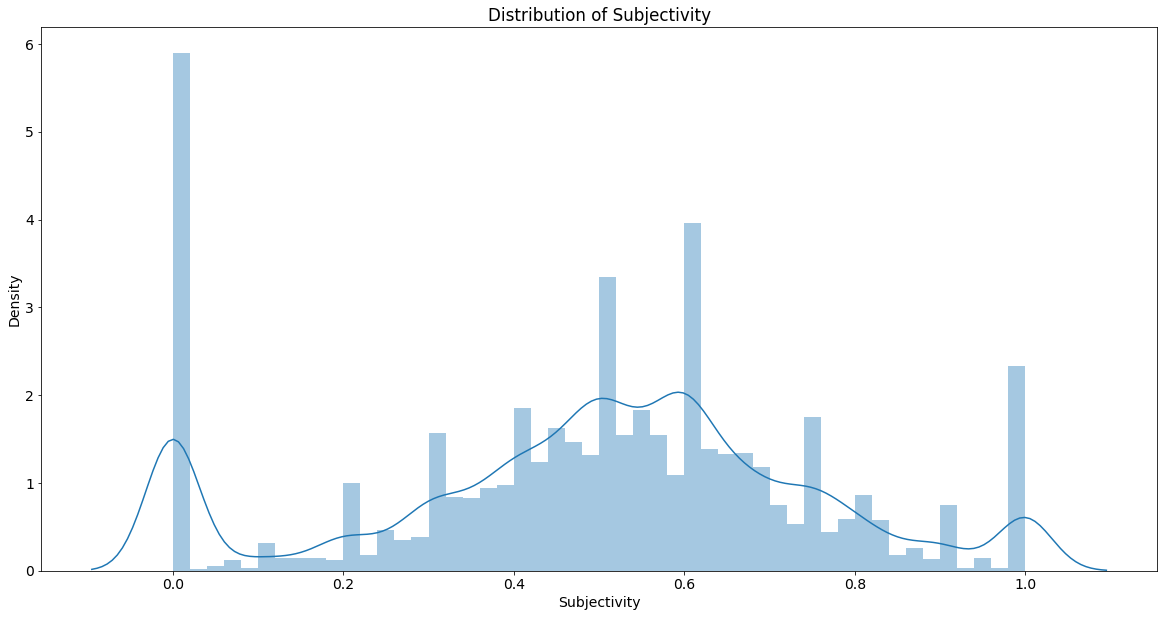

In [251]:
#Plotting the distribution of Subjectivity
sentiment_subjectivity_df = non_null_user_reviews_df['Sentiment_Subjectivity']
sns.distplot(sentiment_subjectivity_df, hist=True)
plt.xlabel("Subjectivity")
plt.title('Distribution of Subjectivity')

#Analysing the Relationship between the Sentiment Subjectivity and Sentiment Polarity

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of cases, it shows a proportional behavior when variance is too high or low.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between sentiment_subjectivity and sentiment_polarity')

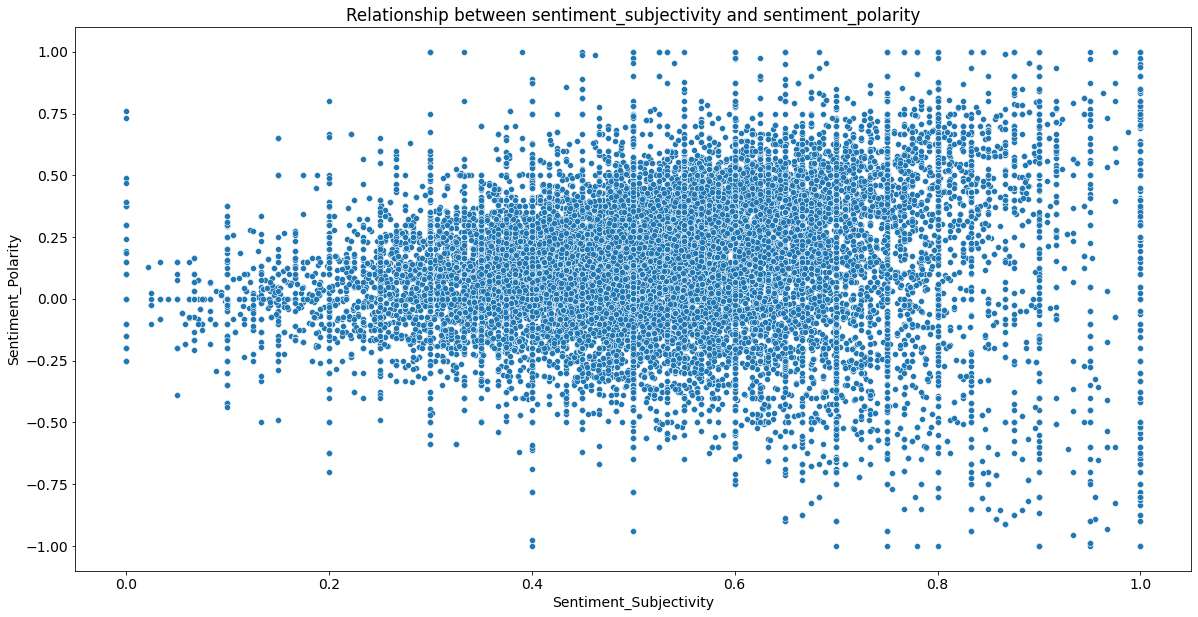

In [252]:
#Plotting the relationship between sentiment_subjectivity and sentiment_polarity in scatter plot
sns.scatterplot(non_null_user_reviews_df['Sentiment_Subjectivity'], non_null_user_reviews_df['Sentiment_Polarity'])
plt.title("Relationship between sentiment_subjectivity and sentiment_polarity")

#Sentiment percentage analyse
The below plot show that the Postitive reviews are in high, so that it can be conluded that the over all reviews are Positive

In [253]:
#Counts of Review sentiments
non_null_user_reviews_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

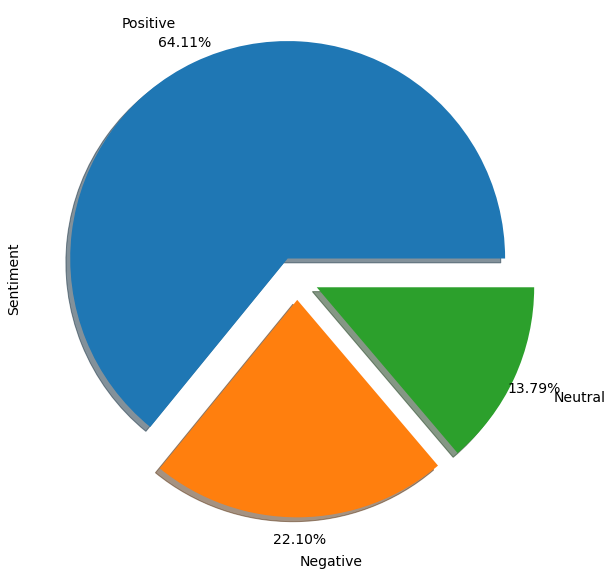

In [254]:
#Percentage of Review sentiments
non_null_user_reviews_df['Sentiment'].value_counts().plot(kind='pie', explode= (0.1,0.1,0.1), shadow=True, autopct='%1.2f%%', pctdistance=1.1, labeldistance=1.2)

#Conclusion
The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.